In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os

In [2]:
path= '/Users/milivanili/Desktop/ Instacart Basket Analysis '

In [3]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))


In [4]:
#Create subset of first milion rows
df = df_ords_prods_merge[:1000000]

<Axes: >

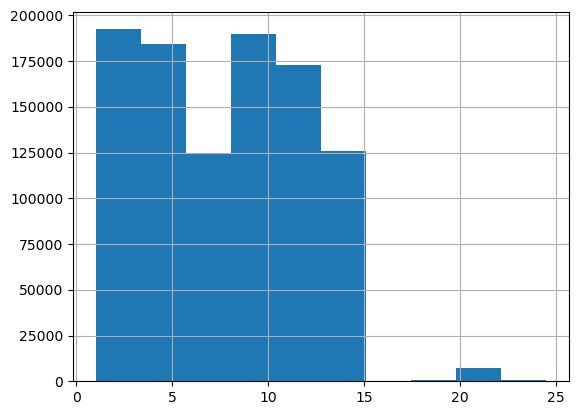

In [5]:
df['prices'].hist() #will show a histogram

In [6]:
df = df[df['prices'] < 15]

In [7]:
# Define a function for price labels

def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [8]:
# Apply price range function. 
df['price_range'] = df.apply(price_label, axis=1)

In [9]:
df['price_range'].value_counts(dropna = False)

price_range
Mid-range product    643997
Low-range product    338018
Name: count, dtype: int64

In [10]:
# Find most expensive product.

df['prices'].max()

14.9

In [11]:
# Use loc() method on df subset to apply price range function.

df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [12]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [13]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [14]:
df['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product    643997
Low-range product    338018
Name: count, dtype: int64

In [15]:
# Use loc() method on entire ords_prods_merge dataframe to apply price range function.

df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [16]:
df_ords_prods_merge.loc[(df_ords_prods_merge['prices'] <= 15) & (df_ords_prods_merge['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [17]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [18]:
df_ords_prods_merge['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

In [19]:
df_ords_prods_merge.rename(columns = {'order_dow' : 'order_day_of_week'}, inplace = True)

In [20]:
#Summirize the bussiest day
df_ords_prods_merge['order_day_of_week'].value_counts(dropna=False)

order_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [21]:
#Creating New column "The busiest day"
result=[]

for value in df_ords_prods_merge['order_day_of_week']:
    if value==0:
        result.append('Busiest Day')
    elif value==4:
        result.append('Least busy')
    else:
        result.append('Regulary Busy')
                    
            

In [22]:
result

['Regulary Busy',
 'Regulary Busy',
 'Busiest Day',
 'Regulary Busy',
 'Least busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Least busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Busiest Day',
 'Busiest Day',
 'Busiest Day',
 'Busiest Day',
 'Busiest Day',
 'Least busy',
 'Regulary Busy',
 'Regulary Busy',
 'Busiest Day',
 'Regulary Busy',
 'Regulary Busy',
 'Least busy',
 'Regulary Busy',
 'Busiest Day',
 'Regulary Busy',
 'Busiest Day',
 'Least busy',
 'Busiest Day',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Regulary Busy',
 'Busiest Day',
 'Regulary Busy',
 'Regulary 

In [23]:
df_ords_prods_merge['Busiest_day']=result

In [24]:
df_ords_prods_merge['Busiest_day'].value_counts(dropna= False)

Busiest_day
Regulary Busy    22416875
Busiest Day       6204182
Least busy        3783802
Name: count, dtype: int64

# Task 4.7

In [25]:
#Question 2, create a new column for this using a suitable method.
result_2 = []

for value in df_ords_prods_merge["order_day_of_week"]:
  if value == 0 or value == 1:
    result_2.append("Busiest days")
  elif value == 4 or value == 3:
    result_2.append("Slowest days")
  else:
    result_2.append("Regularly busy")

In [26]:
result_2

['Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Slowest days',
 'Slowest days',
 'Busiest days',
 'Regularly busy',
 'Slowest days',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Slowest days',
 'Slowest days',
 'Regularly busy',
 'Slowest days',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Slowest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',

In [27]:
#Question 3, # Create new 'busiest_days' column in ords_prods_merge to view results in context.

df_ords_prods_merge['busiest_days'] = result_2


In [28]:
df_ords_prods_merge['busiest_days'].value_counts(dropna=False)

busiest_days
Regularly busy    12916111
Busiest days      11864412
Slowest days       7624336
Name: count, dtype: int64

In [29]:
## Check output of ords_prods_merge with new "busiest days" column.
df_ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,Busiest_day,busiest_days
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regulary Busy,Regularly busy
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regulary Busy,Regularly busy
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,both,Mid-range product,Busiest Day,Busiest days
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,10,0,both,Mid-range product,Regulary Busy,Slowest days
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,both,Mid-range product,Least busy,Slowest days


The total value counts for the ords_prods_merge dataframe is equal to the total sum of all groupings (i.e. "Regularly busy" + "Busiest days" + "Slowest days"). In addition, the listed sums for each label match the sum totals for the qualifying days of the week (e.g. Total "Busiest days" = 11864412, which matches orders_day_of_week 0 + 1, or 6204182 + 5660230).

In [30]:
#Question 4, Check value counts in 'order hour of day'
df_ords_prods_merge['order_hour_of_day'].value_counts()

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

In [31]:
# Create for-loop if statement labeling periods of time as “Most orders,” “Average orders,” and “Fewest orders.”
result_3 = []

for value in df_ords_prods_merge["order_hour_of_day"]:
  if value in [10, 11, 14, 15, 13, 12, 16, 9]:
    result_3.append("Most orders")
  elif value in [23, 6, 0, 1, 5, 2, 4, 3]:
    result_3.append("Fewest orders")
  else:
    result_3.append("Average orders")

In [32]:
result_3

['Most orders',
 'Average orders',
 'Average orders',
 'Most orders',
 'Average orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Average orders',
 'Fewest orders',
 'Average orders',
 'Fewest orders',
 'Fewest orders',
 'Fewest orders',
 'Fewest orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Fewest orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Average orders',
 'Most orders',
 'Most ord

In [33]:
##Create new column 'busiest_period_of_day'
df_ords_prods_merge['busiest_period_of_day'] = result_3

In [34]:
#Question 5, Print the frequency for this new column.
df_ords_prods_merge['busiest_period_of_day'].value_counts()

busiest_period_of_day
Most orders       21118071
Average orders     9997651
Fewest orders      1289137
Name: count, dtype: int64

In [35]:
df_ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [38]:
df_ords_prods_merge = df_ords_prods_merge[df_ords_prods_merge['prices'] < 100]

In [39]:
df_ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

Export your dataframe as a pickle file and in “Prepared Data” folder.

In [40]:
df_ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_derived.pkl'))